# Assignment 3: K-means clustering

## Description

In this assignment, you are going to implement k-means algorithm on MNIST, given the MNIST dataset array of shape 70000\*784, you have to output an array of 70000 assigned cluster indices.

## Requirement

The only requirement is that the mean L2 distance from the data points to the corresponding cluster centroids should be less than a certain value. Your k-means should iteratively minimize this objective.

To run the algorithm step-by-step, you have to implement k-means as a **generator**. The following is a reference of what Python generator is: [https://stackabuse.com/python-generators/](https://stackabuse.com/python-generators/).

## Scoring and Submission

Your assignment score will be printed out while running k-means! There is no time limit this time, after you click *Runtime / Restart and run all* and have your ideal score printed out, you can download this notebook as `XXXXXXX.ipynb` and upload it to E3, where `XXXXXXX` is your student ID.

- You have to "restart and run all", and **keep the output of the last cell when you download this notebook**.
- You only need to submit the `.ipynb` file to E3, do not zip it!

In [203]:
###########################
# DO NOT CHANGE THIS CELL #
###########################

import os, pickle
import numpy as np
from PIL import Image
from IPython.display import display


def load_mnist():
    if not os.path.exists('mnist.pkl'):
        url = 'https://lab.djosix.com/mnist.pkl.gz'
        assert os.system(f'wget -O mnist.pkl.gz {url}') == 0
        assert os.system('gunzip mnist.pkl.gz') == 0

    with open('mnist.pkl', 'rb') as f:
        return pickle.load(f)


def sample_from_clusters(X, cluster_indices, num_clusters, k=32):
    """
    Sample k MNIST images from each cluster, one row per cluster, and form an image.
    """

    rows = []

    for i in range(num_clusters):
        row = X[np.where(cluster_indices == i)]
        row = row[np.random.choice(row.shape[0], size=k, replace=True)]
        row = row.reshape(-1, 28, 28) # each datapoint is an 28x28 image
        row = np.concatenate(row, 1)

        rows.append(row) # sampled images
        rows.append(np.full([1, row.shape[1]], 255, dtype=np.uint8)) # white line

    rows = np.concatenate(rows, 0)

    return Image.fromarray(rows)


def compute_mean_distance(X, cluster_indices, num_clusters):
    """
    Compute mean L2 distance from data points to their cluster centroids.
    """

    total = np.zeros([num_clusters, X.shape[1]])
    count = np.zeros([num_clusters])

    for x, c in zip(X, cluster_indices):
        total[c] += x
        count[c] += 1

    count[count == 0] = 1 # avoid zero division when there is nothing in a cluster
    means = total / count[:, np.newaxis]

    distances = np.sqrt(np.power(X - means[cluster_indices], 2).sum(1))
    return distances.mean()


def your_score(mean_distance):
    r = (mean_distance - 1575) / (1700 - 1575)
    return round(min(max(100 - 50 * r, 0), 100))

###########################
# DO NOT CHANGE THIS CELL #
###########################

## Implement your k-means

In [204]:
def kmeans(X, num_clusters):
    """
    Run K-means algorithm on X and yield assigned cluster indices at each steps.

    Args:
        X (np.ndarray):
        An array of size N*D, where N is the dataset size and D is the number of
        features. For MNIST, N is 70000 and D is 784 (28x28).
        num_clusters (int):
        Number of clusters.
    
    Yields:
        (np.ndarray)
        An integer array of cluster indices (start from 0) assigned to each
        data points, the array size should be N.
    """

    num_feat = len(X[1])
    max_dept = 80

    # NOTE: If your code includes randomness, please set a seed so that we can
    #       reproduce your result. You can try other seeds to get better score.
    np.random.seed(9487)
    
    # Init
    group_info = np.random.randint(num_clusters, size = X.shape[0])
    group_mean = np.zeros([num_clusters, num_feat])
    datas_grop = [[] for i in range(num_clusters)]

    for i, j in zip(X, group_info):
        datas_grop[j].append(i)

    for i in range(num_clusters):
        group_mean[i] = np.mean(datas_grop[i], axis = 0)
        
        # print(i, len(datas_grop[i]), group_mean[i])
    
    # distances = np.sqrt(np.power(X - means[cluster_indices], 2).sum(1))

    INF = 2147483647
    delta = 0
    dep = 0
    while True:
        # Yield cluster index for each point in X
        # yield np.random.randint(num_clusters, size=X.shape[0]) # change this
        dep += 1
        for i in range(X.shape[0]):
            now_grp = group_info[i]
            nxt_grp = now_grp
            dis_min = INF
            for j in range(num_clusters):
                tmp_dis = np.sqrt(np.power(X[i] - group_mean[j], 2).sum())
                if tmp_dis < dis_min:
                    dis_min = tmp_dis
                    nxt_grp = j
            
            delta += (now_grp != nxt_grp)
            group_info[i] = nxt_grp
            # print(f"now = {now_grp}, nxt = {nxt_grp}")

        yield group_info
        # You should implement a stopping criteria
        # print(f"Delta = {delta}")
        if delta < 1000 or dep >= max_dept:
            return group_info
        
        # Recalculate mean
        group_mean = np.zeros([num_clusters, num_feat])    
        datas_grop = [[] for i in range(num_clusters)]

        for i, j in zip(X, group_info):
            datas_grop[j].append(i)

        for i in range(num_clusters):
            group_mean[i] = np.mean(datas_grop[i], axis = 0)

## Test your k-means

step: 0, mean_distance: 1702.200893439436, score: 49


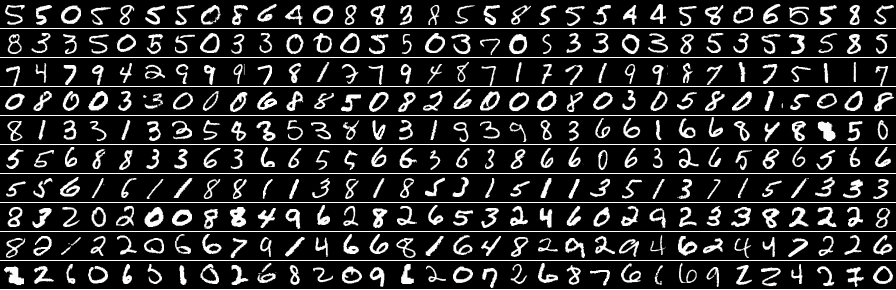

step: 1, mean_distance: 1645.0413347355604, score: 72


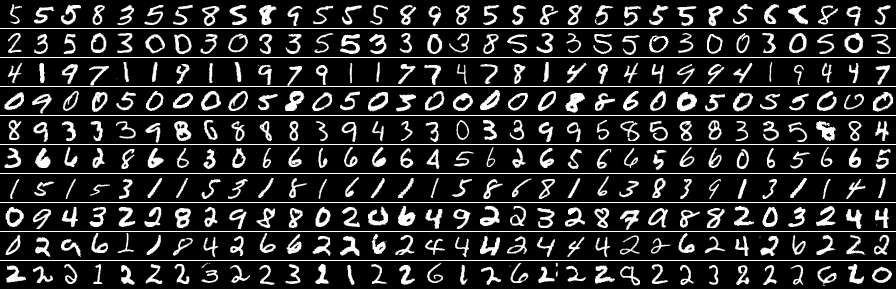

step: 2, mean_distance: 1625.7799131495747, score: 80


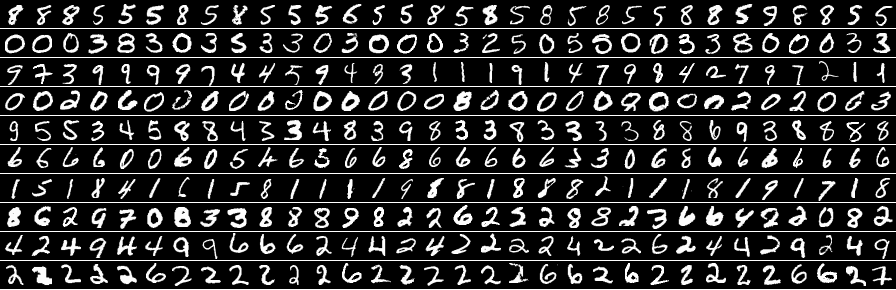

step: 3, mean_distance: 1614.1109837928923, score: 84


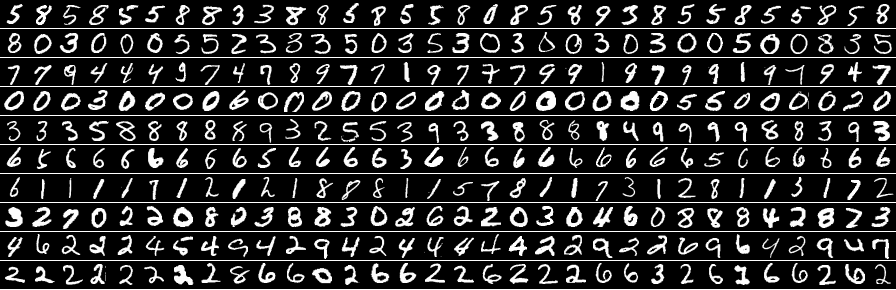

step: 4, mean_distance: 1605.3549402540882, score: 88


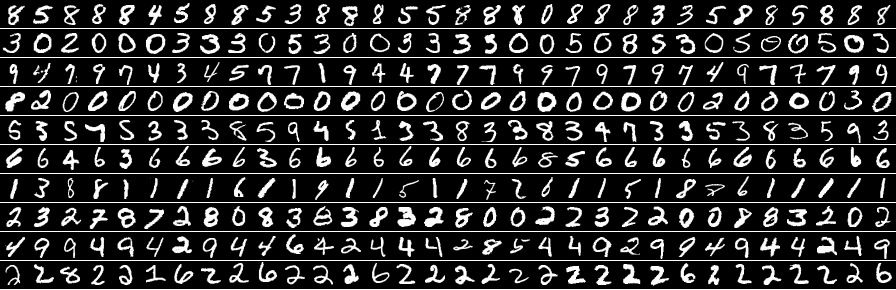

step: 5, mean_distance: 1599.6597035071363, score: 90


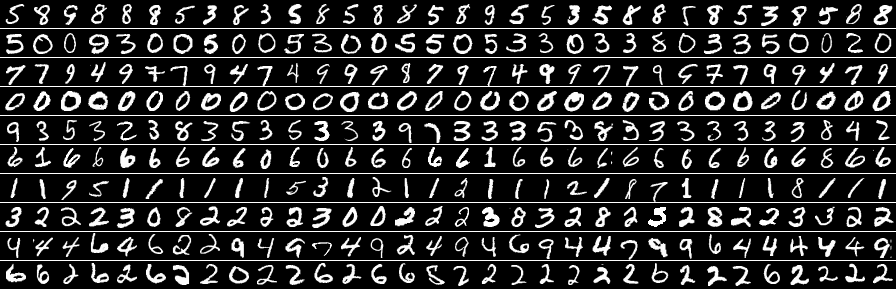

step: 6, mean_distance: 1595.3663609065131, score: 92


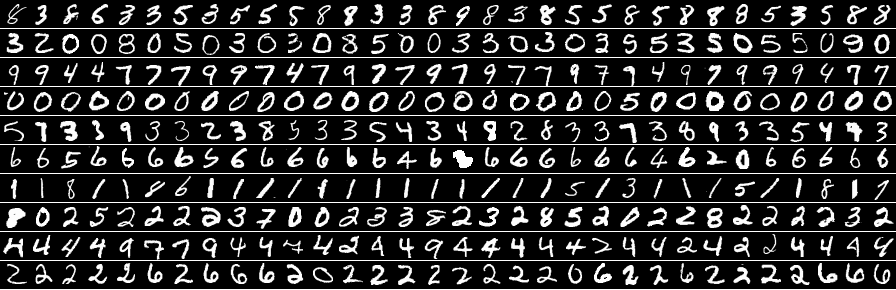

step: 7, mean_distance: 1592.4520925317563, score: 93


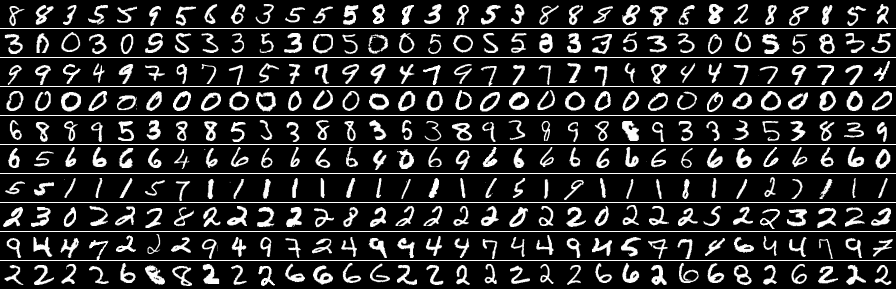

step: 8, mean_distance: 1590.609037803787, score: 94


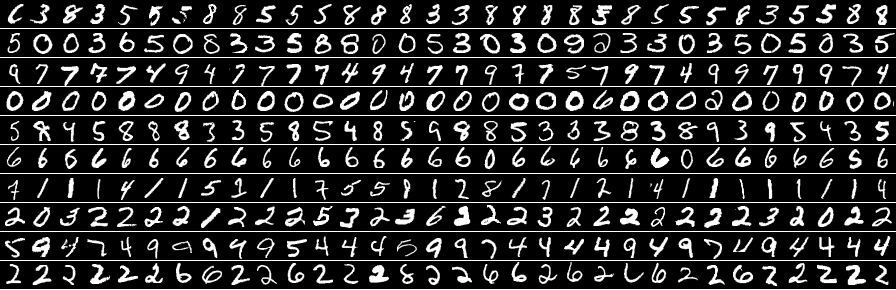

step: 9, mean_distance: 1589.2083506276313, score: 94


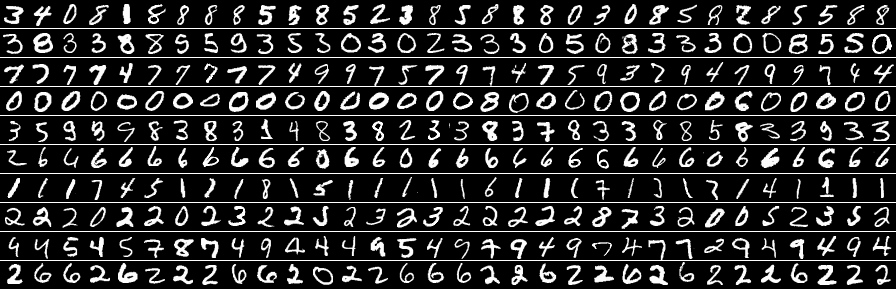

step: 10, mean_distance: 1588.2099829599358, score: 95


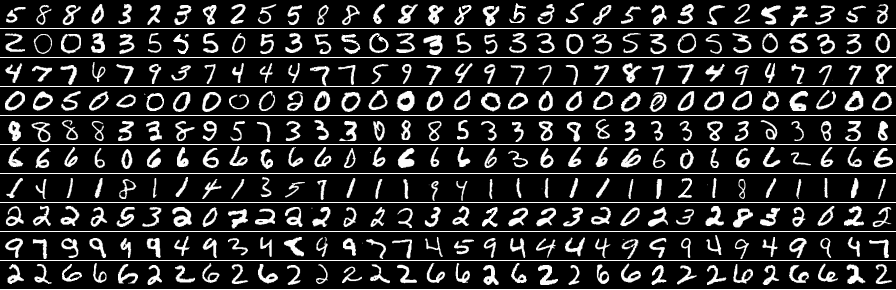

step: 11, mean_distance: 1587.5782301777672, score: 95


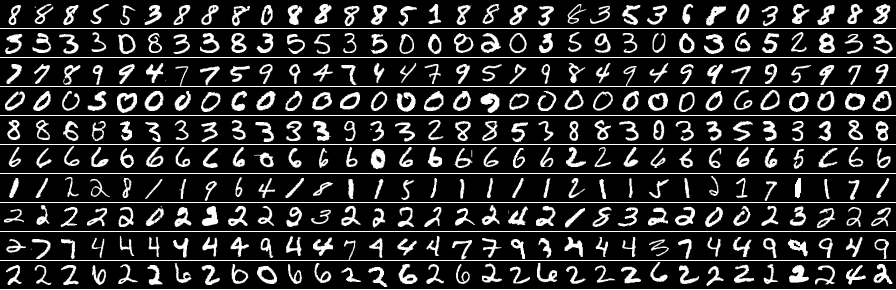

step: 12, mean_distance: 1587.1615693875378, score: 95


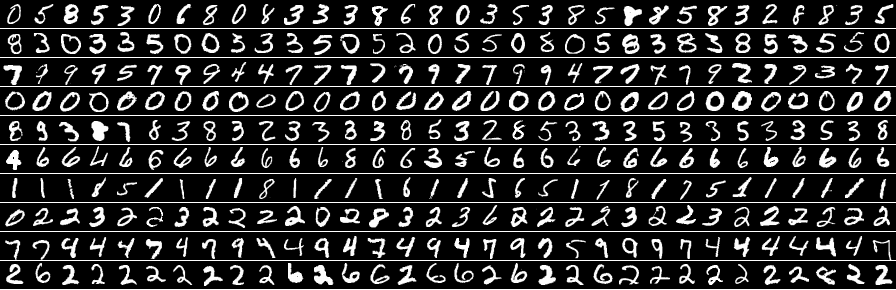

step: 13, mean_distance: 1586.8746219695447, score: 95


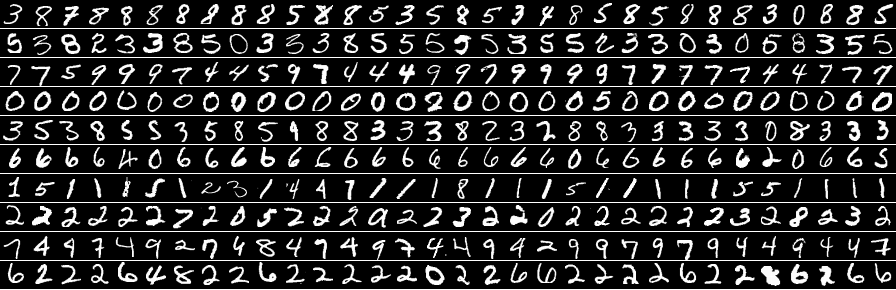

step: 14, mean_distance: 1586.6265739037435, score: 95


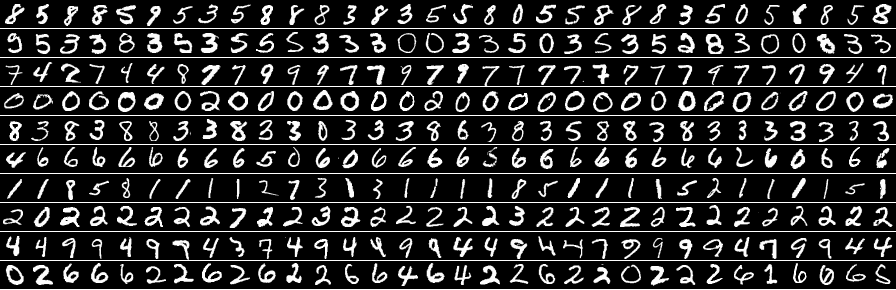

step: 15, mean_distance: 1586.3805919592985, score: 95


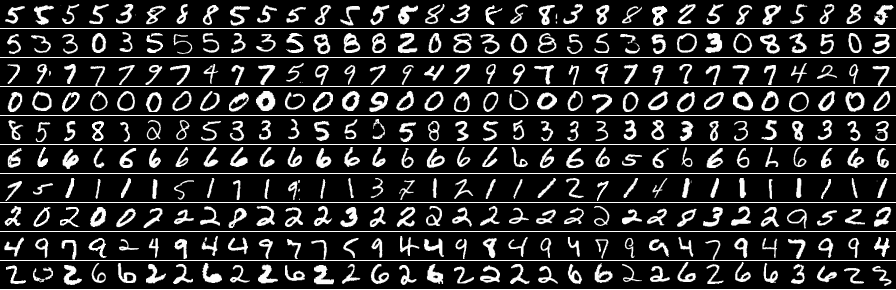

step: 16, mean_distance: 1586.153258711551, score: 96


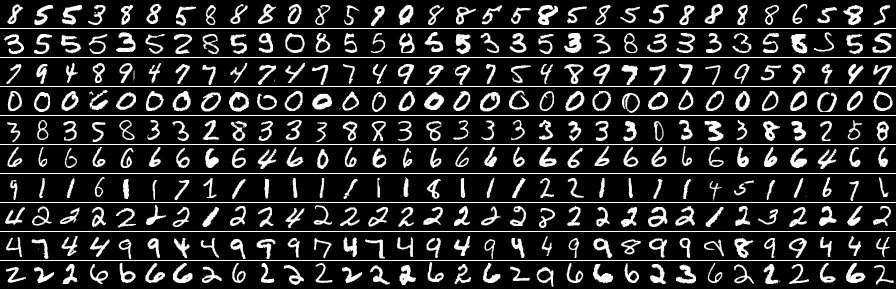

step: 17, mean_distance: 1585.935952780713, score: 96


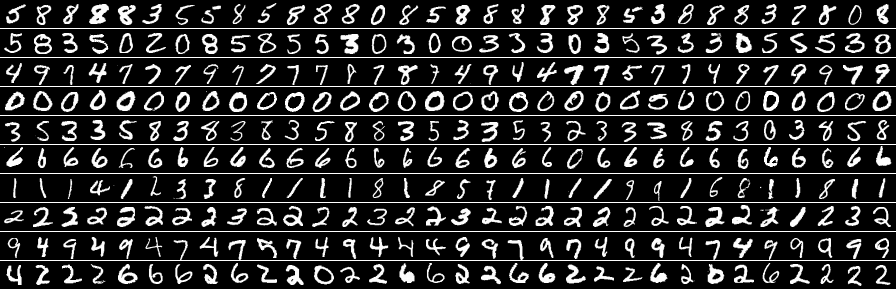

step: 18, mean_distance: 1585.7291475151699, score: 96


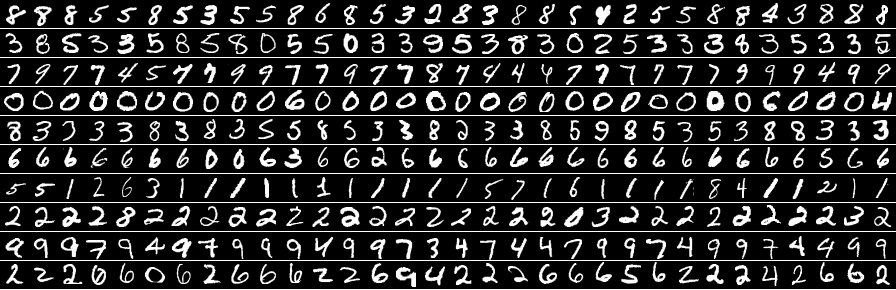

step: 19, mean_distance: 1585.515786884184, score: 96


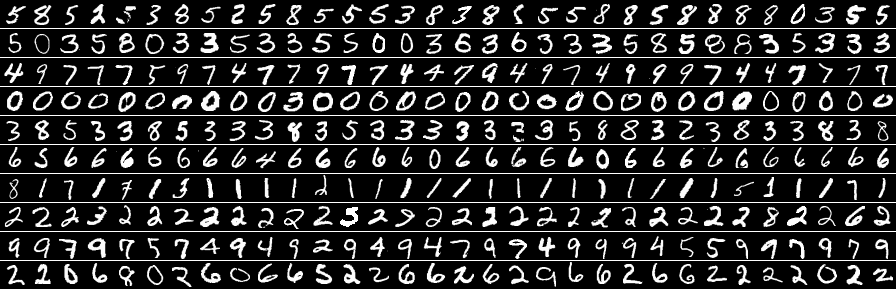

step: 20, mean_distance: 1585.2718236141461, score: 96


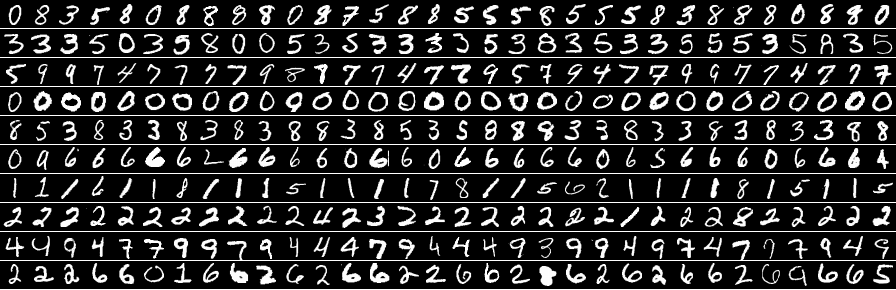

step: 21, mean_distance: 1584.98160715518, score: 96


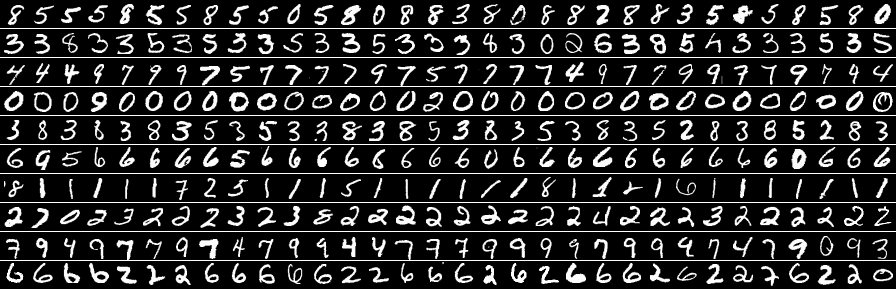

step: 22, mean_distance: 1584.6345286132175, score: 96


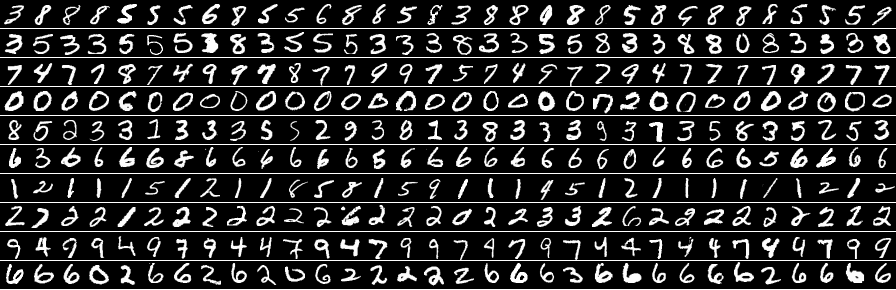

step: 23, mean_distance: 1584.2252465249028, score: 96


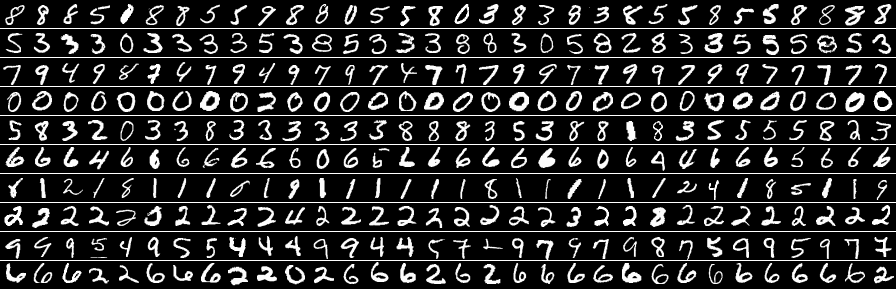

step: 24, mean_distance: 1583.7502177308213, score: 96


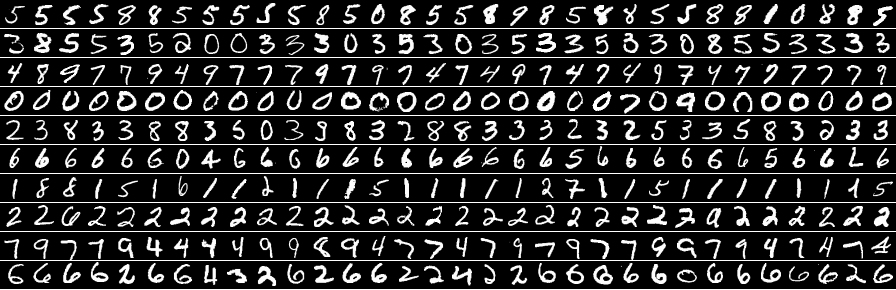

step: 25, mean_distance: 1583.2746424268773, score: 97


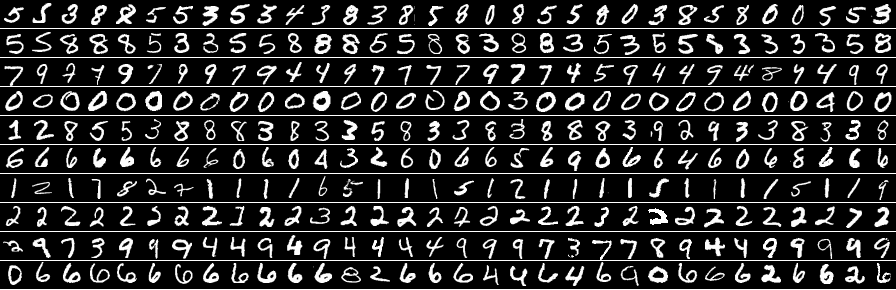

step: 26, mean_distance: 1582.8469787151869, score: 97


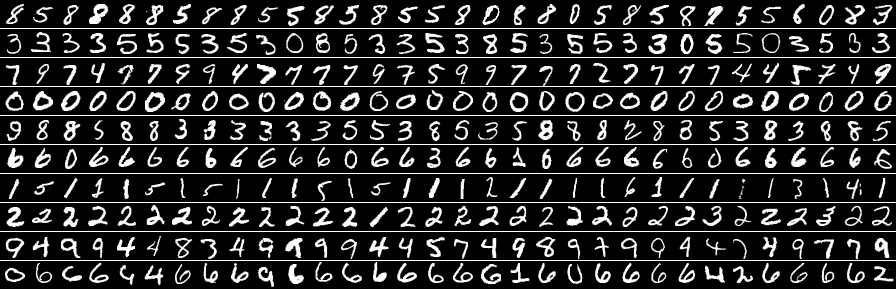

step: 27, mean_distance: 1582.5765477456757, score: 97


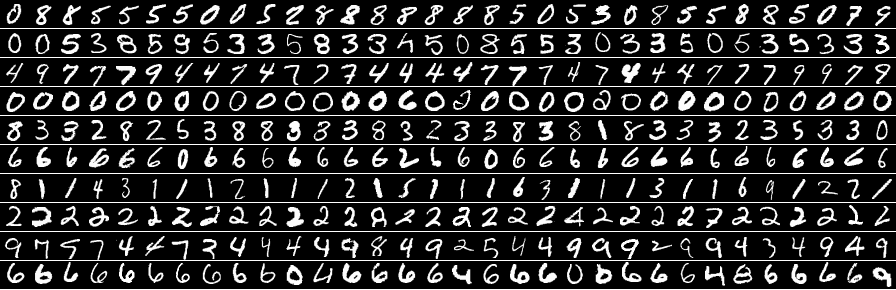

step: 28, mean_distance: 1582.4300232894332, score: 97


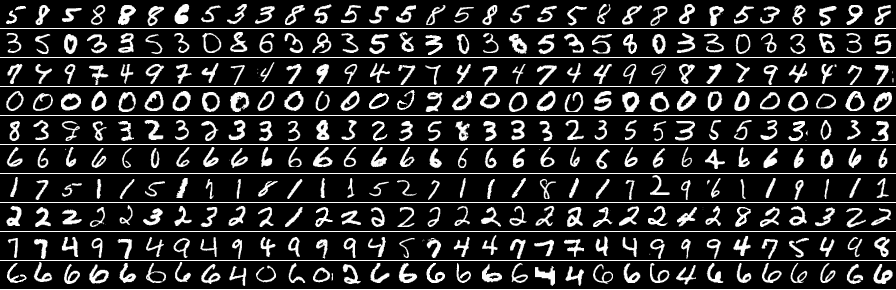

step: 29, mean_distance: 1582.3443132079274, score: 97


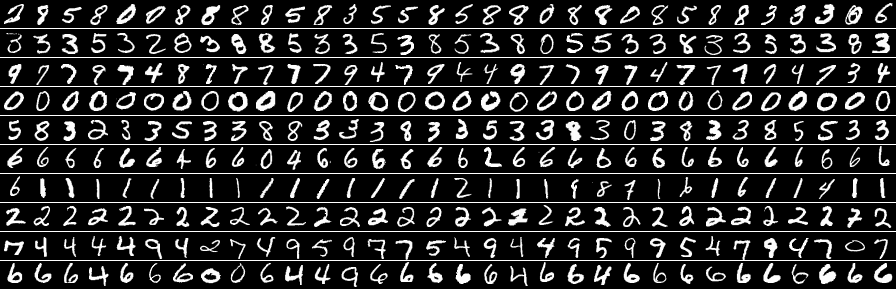

step: 30, mean_distance: 1582.2698202506576, score: 97


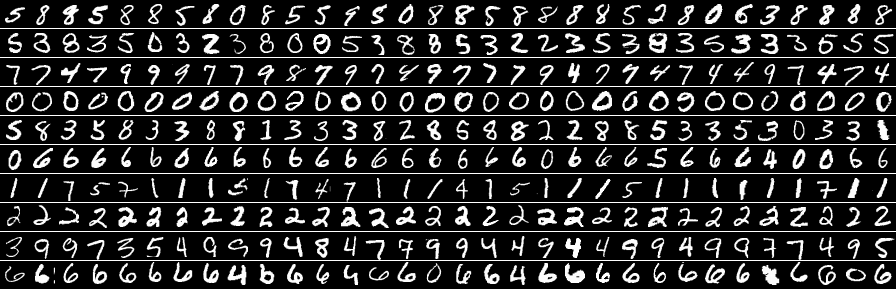

step: 31, mean_distance: 1582.1935217974426, score: 97


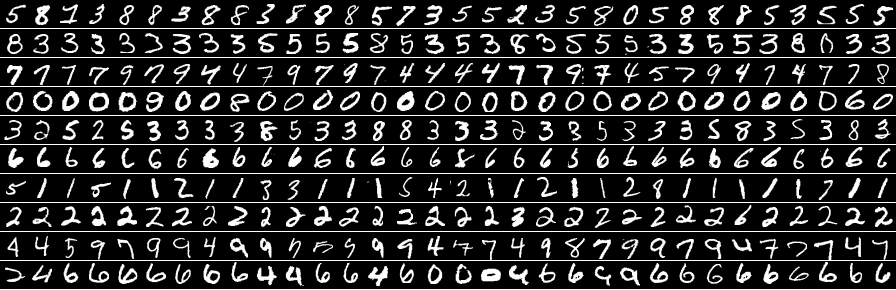

step: 32, mean_distance: 1582.1284651210126, score: 97


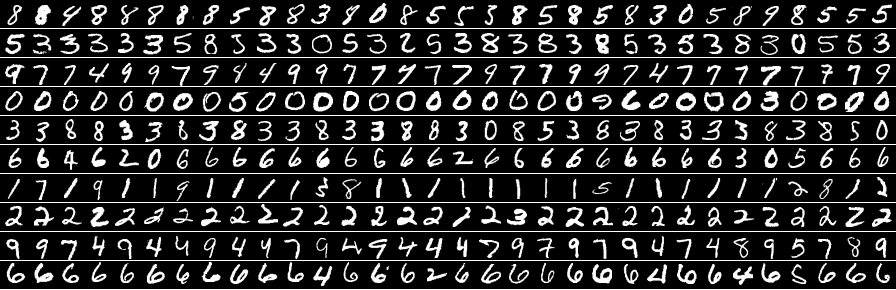

step: 33, mean_distance: 1582.0695068008592, score: 97


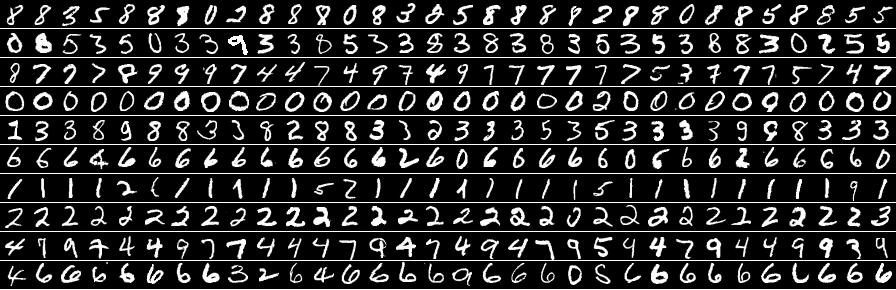

step: 34, mean_distance: 1582.009850860397, score: 97


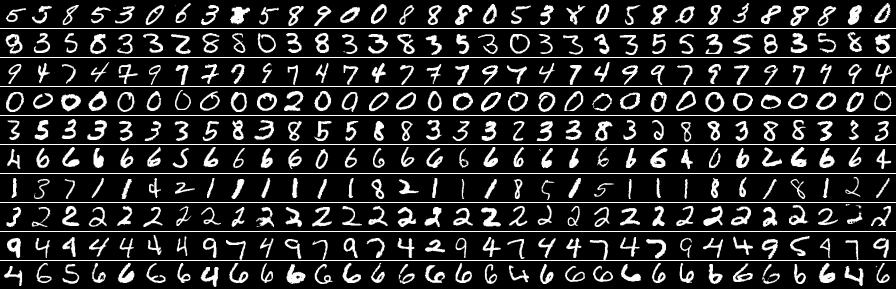

step: 35, mean_distance: 1581.9502899861254, score: 97


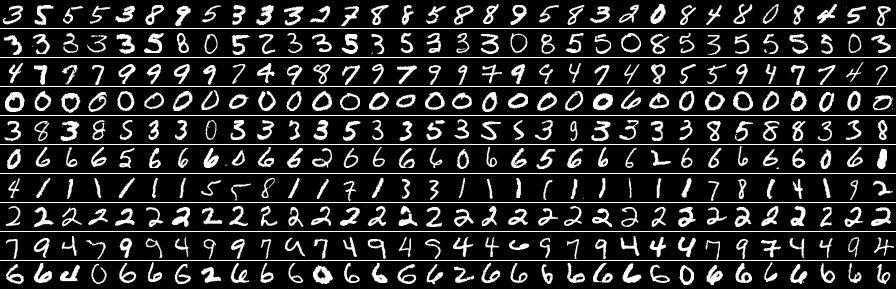

step: 36, mean_distance: 1581.8940513266646, score: 97


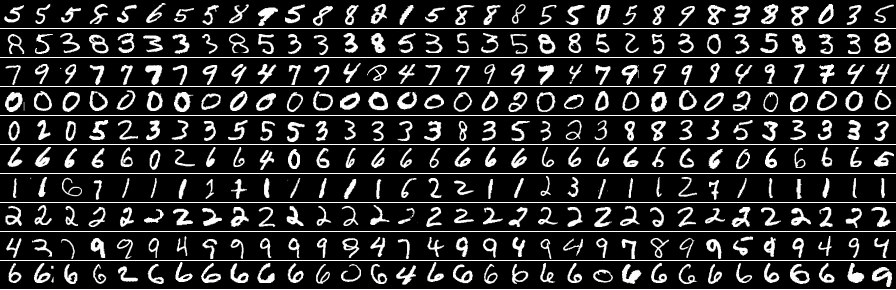

step: 37, mean_distance: 1581.8396594473495, score: 97


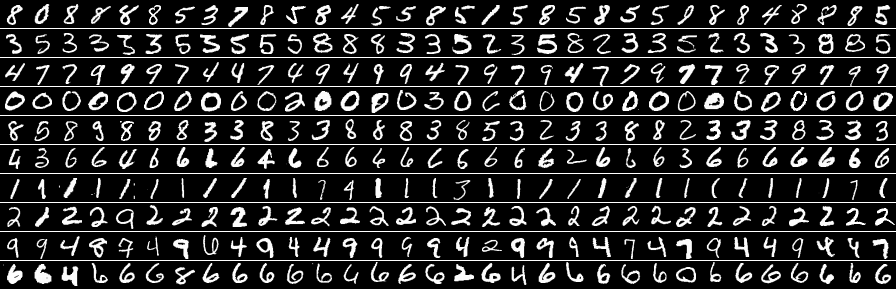

step: 38, mean_distance: 1581.7846876493602, score: 97


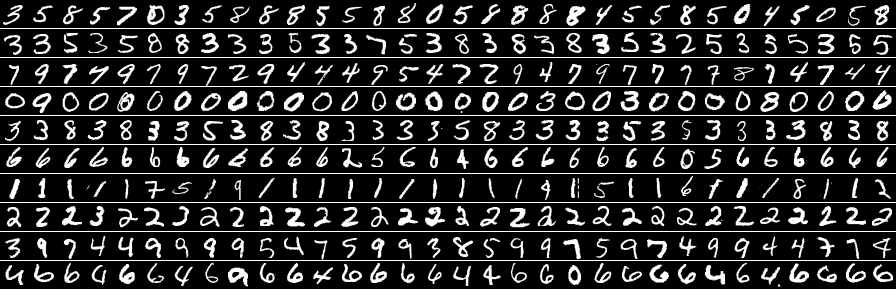

step: 39, mean_distance: 1581.7345424558039, score: 97


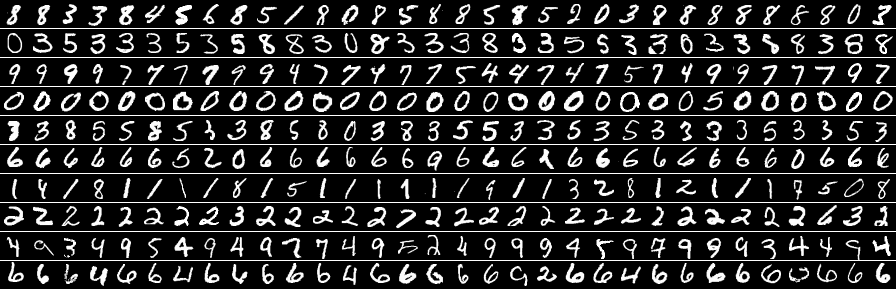

step: 40, mean_distance: 1581.6893145551994, score: 97


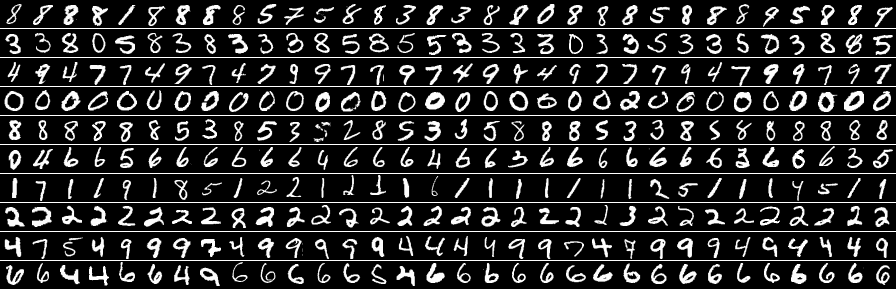

step: 41, mean_distance: 1581.6392993947297, score: 97


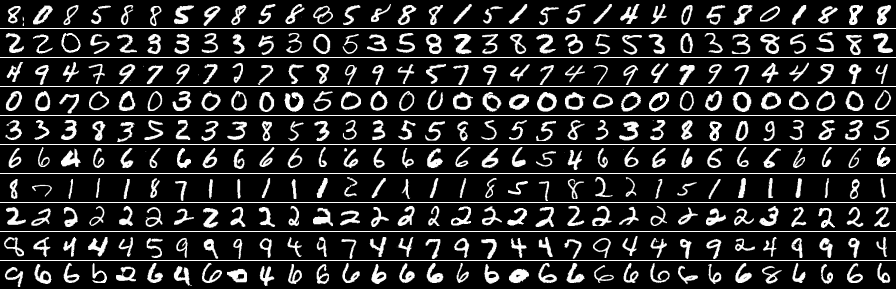

step: 42, mean_distance: 1581.5972403365886, score: 97


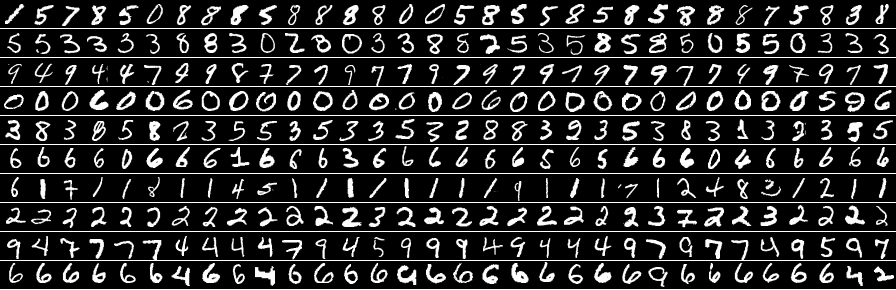

step: 43, mean_distance: 1581.554300181771, score: 97


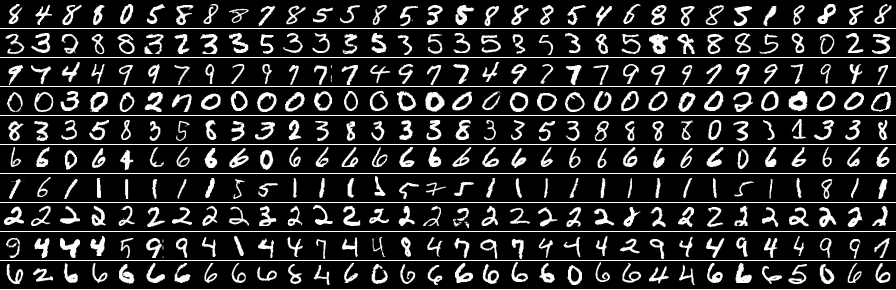

step: 44, mean_distance: 1581.506036951884, score: 97


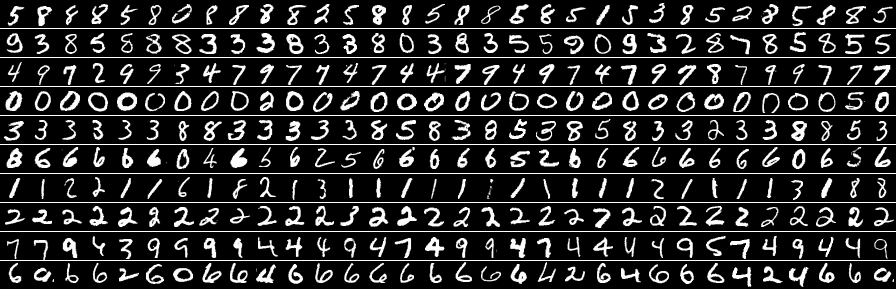

step: 45, mean_distance: 1581.4465215247128, score: 97


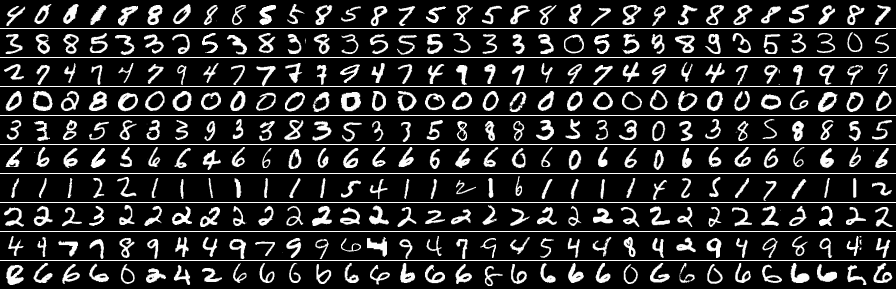

step: 46, mean_distance: 1581.3858901396586, score: 97


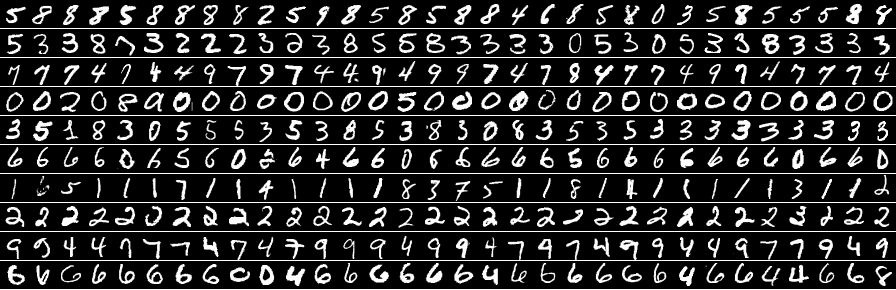

step: 47, mean_distance: 1581.3268280133182, score: 97


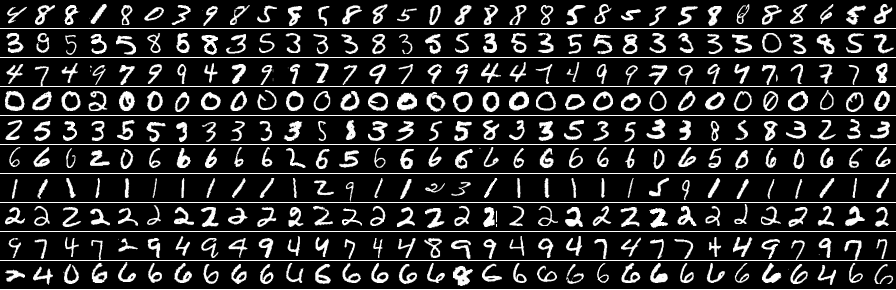

step: 48, mean_distance: 1581.2607606176618, score: 97


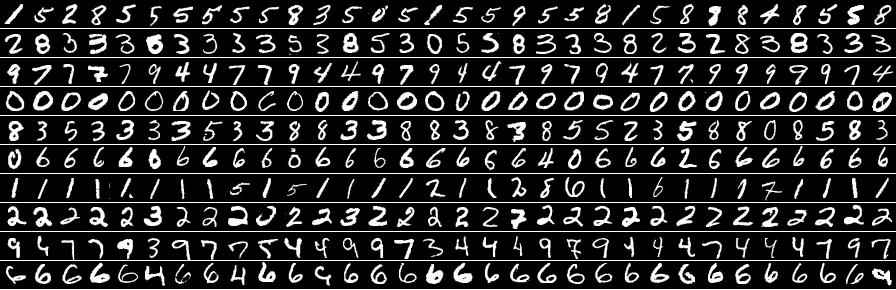

step: 49, mean_distance: 1581.1868548791986, score: 98


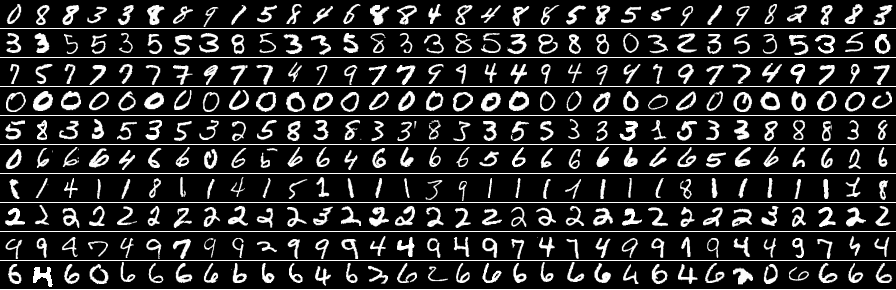

step: 50, mean_distance: 1581.1076133088254, score: 98


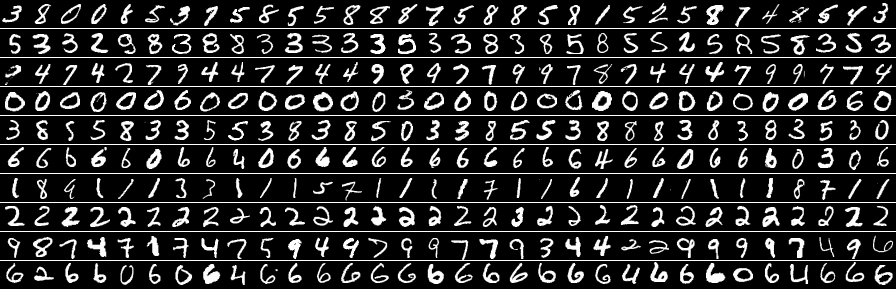

step: 51, mean_distance: 1581.0270886304952, score: 98


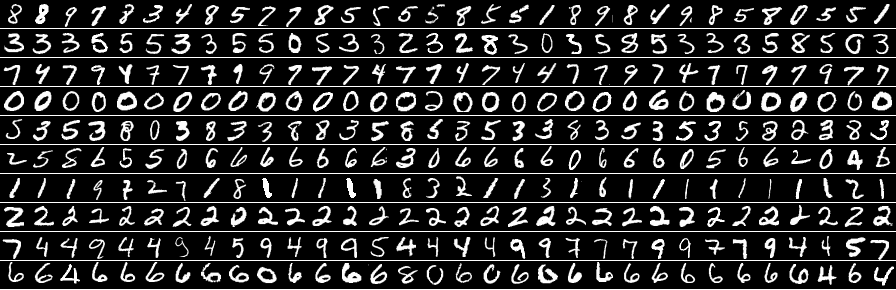

step: 52, mean_distance: 1580.944313814439, score: 98


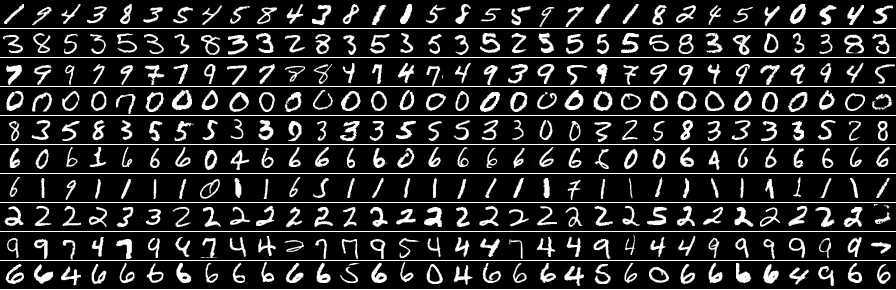

step: 53, mean_distance: 1580.858363007671, score: 98


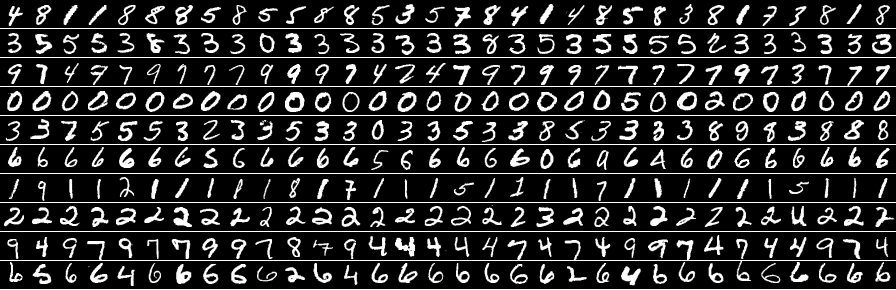

step: 54, mean_distance: 1580.7721118980228, score: 98


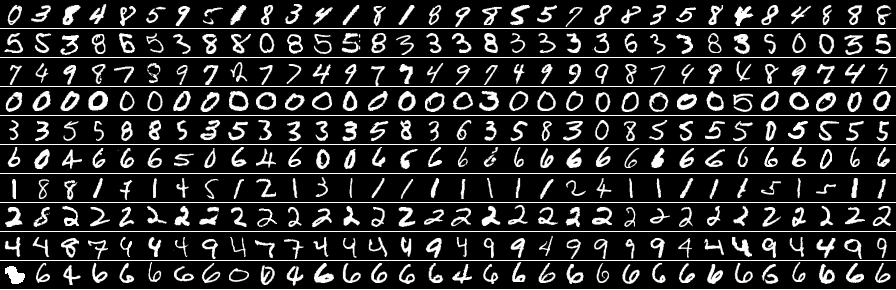

step: 55, mean_distance: 1580.672240970824, score: 98


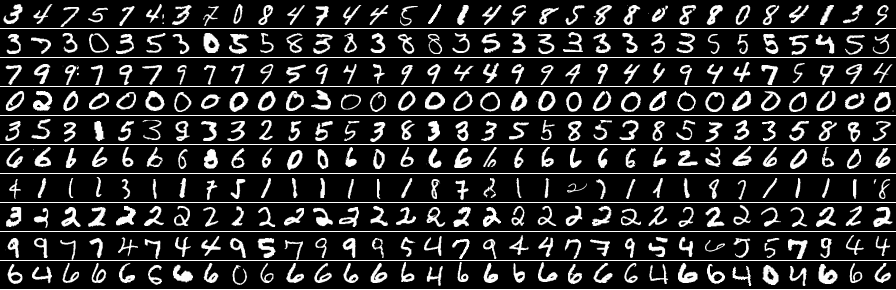

step: 56, mean_distance: 1580.5539055324475, score: 98


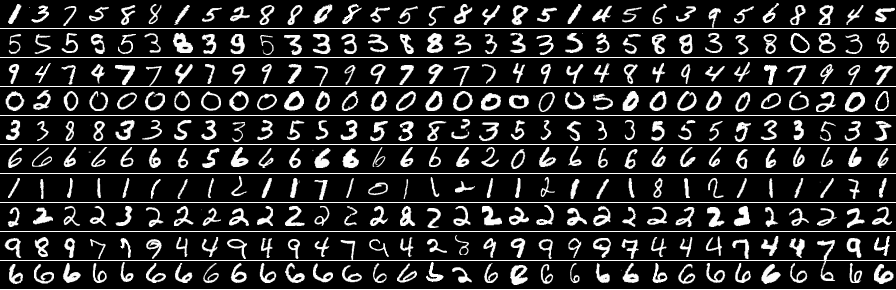

step: 57, mean_distance: 1580.4246573575126, score: 98


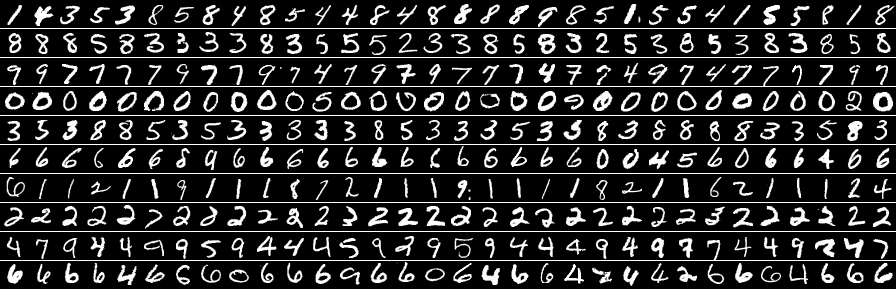

step: 58, mean_distance: 1580.263231563183, score: 98


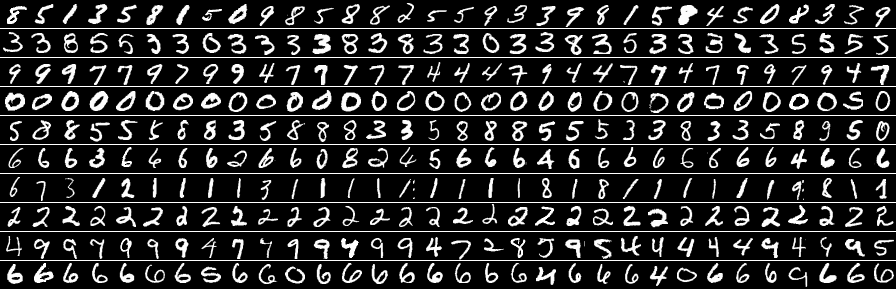

step: 59, mean_distance: 1580.0485605462918, score: 98


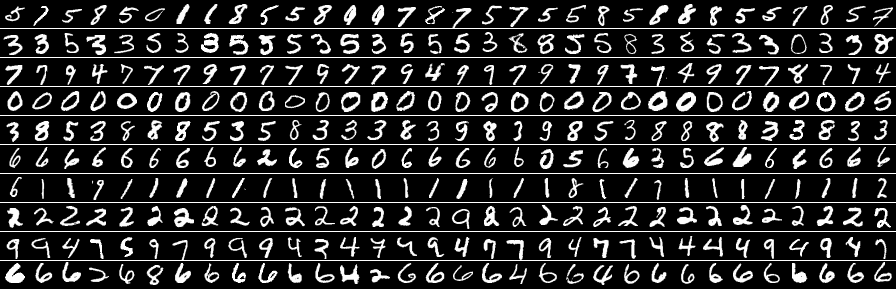

step: 60, mean_distance: 1579.7888436504074, score: 98


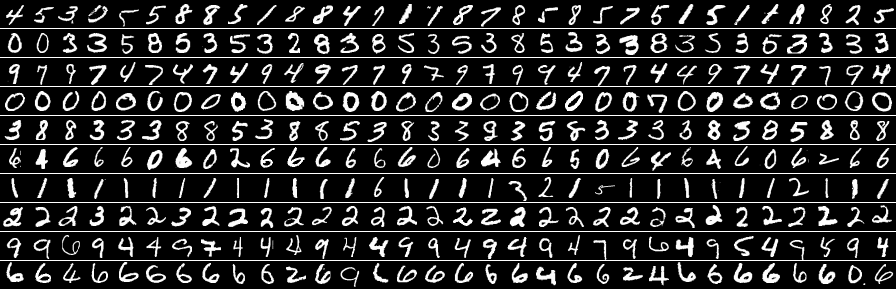

step: 61, mean_distance: 1579.432380639173, score: 98


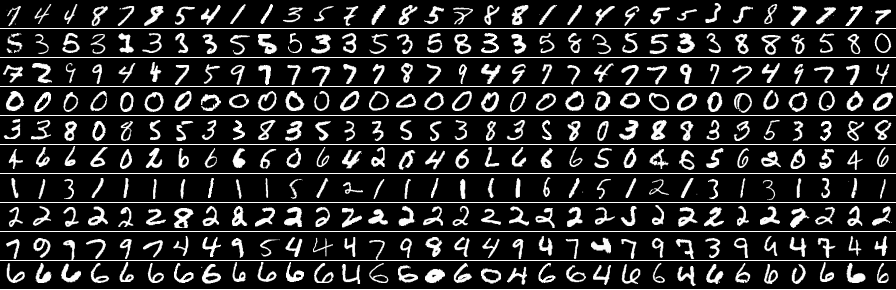

step: 62, mean_distance: 1579.049414637274, score: 98


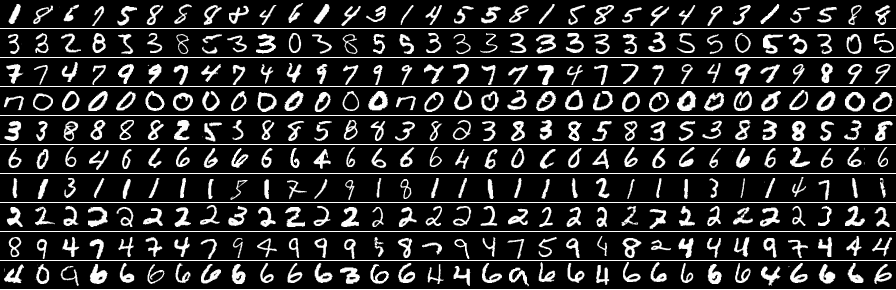

step: 63, mean_distance: 1578.6236968969786, score: 99


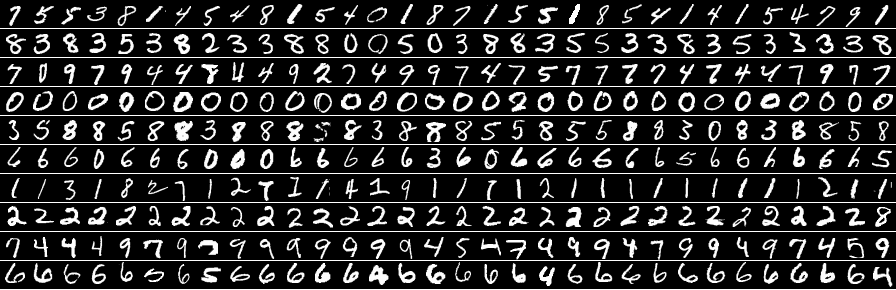

step: 64, mean_distance: 1578.1170640020373, score: 99


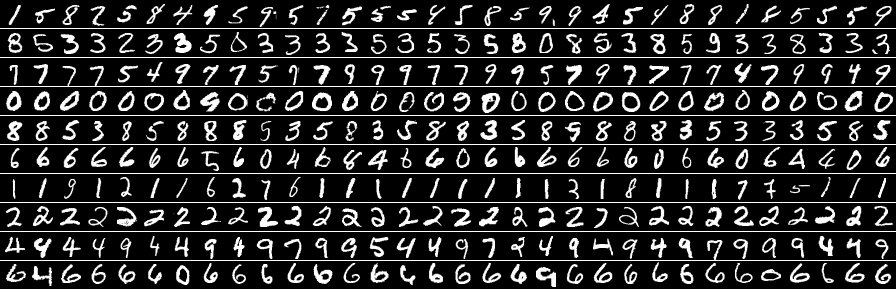

step: 65, mean_distance: 1577.5109342385508, score: 99


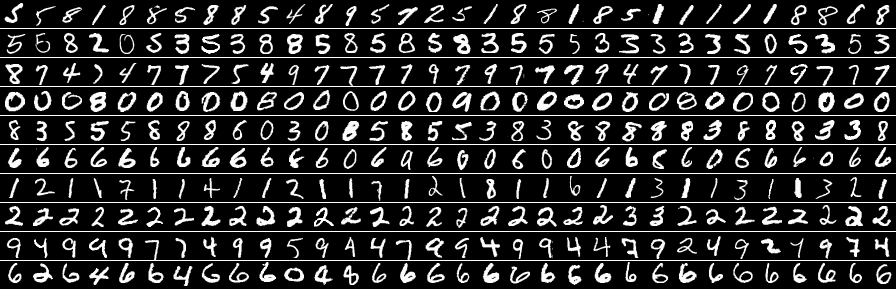

step: 66, mean_distance: 1576.824937687068, score: 99


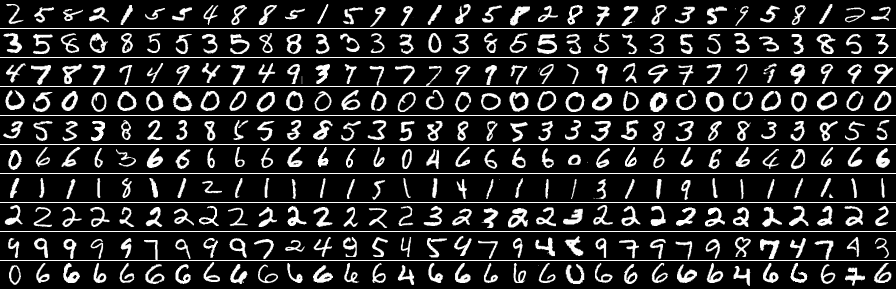

step: 67, mean_distance: 1576.112002530637, score: 100


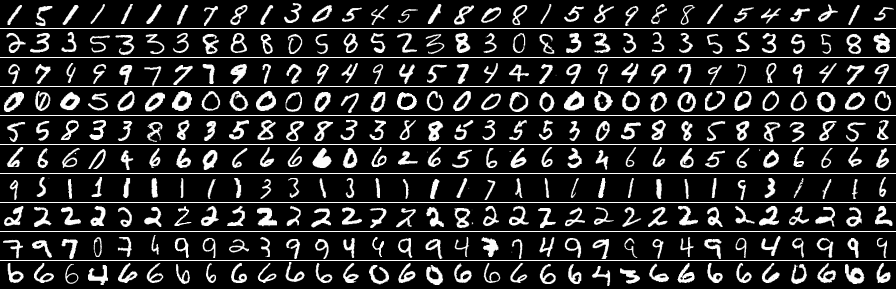

In [205]:
###########################
# DO NOT CHANGE THIS CELL #
###########################

X, _ = load_mnist()
num_clusters = 10

for i, cluster_indices in enumerate(kmeans(X, num_clusters)):
    mean_distance = compute_mean_distance(X, cluster_indices, num_clusters)
    score = your_score(mean_distance)
    print(f'step: {i}, mean_distance: {mean_distance}, score: {score}')
    
    display(sample_from_clusters(X, cluster_indices, num_clusters))

    if score == 100:
        break

###########################
# DO NOT CHANGE THIS CELL #
###########################